(ch:probability-continuous)=
# 연속 확률분포

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`로,
`seaborn`을 `sns`로 불러온다.
`seaborn` 라이브러리는 통계 관련 데이터의 정보를 보다 세련되고 정확하게 전달하는 그래프를 그리는 도구를 제공한다.
`matplotlib` 라이브러리를 바탕으로 만들어져서 함께 사용해도 된다.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

그래프 스타일을 `seaborn`에서 제공하는 `white` 스타일로 지정한다.

In [6]:
sns.set_style("white")

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [7]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

연속 확률 분포의 주요 개념을 소개한다.

- 연속 확률 변수
- 누적 분포 함수
- 확률 밀도 함수
- 커널 밀도 추정
- 결합 확률 분포

## 연속 확률 변수

{numref}`%s장 <ch:probability-discrete>`에서 살펴 본 이산 확률 변수는
$x_1$, $x_2$, $x_3$ ... 등의 형식으로 하나, 둘, 셋 하며 셀 수 있는 
**이산형 값**<font size='2'>discrete value</font>을 취한다.

예를 들어 하나의 정상적인 주사위를 던졌을 때 나오는 값을 가리키는 확률 변수는
1, 2, 3, 4, 5, 6 중에 하나를 취하고,
캘리포니아 주택가격 데이터셋에서 임의로 선택된 구역의 소득 범주를 가리키는 확률 변수는
1, 2, 3, 4, 5 중에 하나를 취한다.
그리고 어느 학급의 수학 시험 점수를 가리키는 확률 변수는 0부터 100까지의 정수 중에 하나를 취한다.

반면에 **연속 확률 변수**<font size='2'>continuous random variable</font>는 
일정 구간에 속한 임의의 실수를 가리킨다.
여기서 구간은 0과 1사이 등 구간의 크기가 유한할 수도 있지만
0보다 큰 모든 실수, 아니면 그냥 모든 실수 처럼 구간의 크기가 무한일 수도 있다.

예를 들어 캘리포니아 주택가격 데이터셋에서 임의로 선택된 구역의 가구중위소득은
0.4999에서 15.0001 사이의 실수로 구성된다.
그리고 대학생의 학점 평균으로 구성된 데이터셋은 0에서 4.5 사이의 실수로 구성된다.

:::{admonition} 실수와 부동소수점
:class: note

프로그래밍에서 실수는 부동소수점으로 표현된다.
부동소수점은 엄밀히 말해 유한소수만 다루지만 여기서는 특별한 의미 없이 실수라는 표현을 사용한다.
:::

**이산 확률 분포 대 연속 확률 분포**

이산 확률 분포는 확률 변수가 특정 값을 가리킬 확률을 표 형식으로 표현한다.
예를 들어 아래 표는 정상적인 주사위 하나를 던졌을 때 나오는 값을 가리키는 확률 변수 $X$의 확률 분포다.

| X | 1 | 2 | 3 | 4 | 5 | 6|
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 |

그리고 {numref}`%s장 <ch:probability-discrete>`에서 살펴 본 아래 표는 캘리포니아 주택가격 데이터셋에서 임의로 선택된 구역의 소득 범주를 가리키는 확률 변수 $X$의 확률 분포다.
1부터 5까지 소득 범주는 중위소득을 0에서 1.5, 1.5에서 3.0, 3.0에서 4.5, 4.5에서 6, 6 이상 등 5개의 구간에 각각 해당한다.

| X | 1 | 2 | 3 | 4 | 5 |
| :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 0.041372 | 0.333011 | 0.361017 | 0.177992 | 0.086607 |

반면에 연속 확률 변수가 따르는 확률 분포를 **연속 확률 분포**<font size='2'>continuous probability distribution</font>라 한다.
이산 확률 분포와는 달리 연속 확률 분포는 확률 변수가 특정 값을 취할 확률을 계산하지 않는다.
이유는 연속 확률 변수 $X$가 특정 실수 $x$를 취할 확률은 항상 0이기 때문이다

$$
P(X=x) = 0
$$

예를 들어 0과 1사이의 실수 중에서 무작위로 하나의 값을 취했을 때 그 값이 정확히 0.5일 확률과
캘리포니아 주택가격 데이터셋에서 임의로 선택된 구역의 중위소득이 정확히 1.999999일 확률 모두 0이다.

연속 확률 분포는 대신 확률 변수가 특정 구간에서 하나의 값을 취할 확률을 계산한다.
0과 1사이에서 무작위로 선택한 값이 0.49에서 0.51 사이일 확률은 0.02, 즉 2%다.
구간 전체의 크기가 1인데 0.49에서 0.51 사이 구간의 크기는 0.02이기 때문이다.
반면에 캘리포니아 주택가격 데이터셋에서 임의로 선택된 구역의 중위소득이 1.5에서 3.0 사이일 확률은 
중위 소득이 2구간에 속할 확률인 0.333011이다.

이처럼 연속 확률 변수는 아래 표현식처럼 특정 구간의 값을 취할 확률을 계산한다.

$$
P(a \le X \le b)
$$

또한 연속 확률 변수가 특정 값을 취할 확률은 0이기에 구간의 끝 포함 여부는 중요하지 않기에
아래 식에서처럼 등호 기호는 생략해도 된다.

$$
P(a \le X \le b) = P(a < X < b) = P(a < X \le b) = P(a \le X < b)
$$

## 누적 분포 함수

0과 1사이의 실수 중에서 구간 $[a, b]$에서 하나의 값을 취할 확률은 $b-a$임을 바로 알 수 있다.
하지만 연속 확률 변수가 특정 구간의 값을 취할 확률을 정확하게 계산하는 일이
일반적으로 그렇게 간단하지 않다.
예를 들어 캘리포니아 주택가격 데이터셋에서 임의로 선택된 구역의 중위소득이 2.0에서 2.1 사이일 확률은 쉽게 알 수 없다.
이유는 해당 구간이 앞서 언급한 대로 0에서 1.5, 1.5에서 3.0, 3.0에서 4.5, 4.5에서 6, 6 이상 등 5개의 구간
어디와도 일치하지 않기 때문이다.

여기서는 **누적 분포 함수**<font size='2'>cumulative distribution function</font>(CDF)를 활용하여
연속 확률 변수가 특정 구간의 값을 취할 확률을 계산하는 방법을 소개한다.
연속 확률 변수 $X$의 누적 분포 함수 $F$는
아래 식에서 처럼 확률 변수 $X$가 특정 값보다 같거나 작은 값을 취할 확률을 계산한다.

$$
F(a) = P(X \le a)
$$

누적 분포 함수가 알려진 경우 연속 확률 변수 $X$가 $a$에서 $b$ 사이의 값을 취할 확률은
다음과 같이 계산된다.
단, $a \le b$를 가정한다.

$$
P(a \le X \le b) = F(b) - F(a)
$$

**예제: 캘리포니아 구역별 중위소득 확률 분포**

확률 변수 $X$가 캘리포니아의 구역별 중위소득을 가리킨다고 할 때
임의로 선택된 구역의 중위소득이 특정 값 이하일 확률을 계산하는 누적 분포 함수 $F$를 
부울 인덱싱을 이용하여 정의할 수 있다.

아래 코드는 캘리포니아 주택가격 데이터셋을 불러온 후에
중위주택가격이 50만을 초과하는 경우는 삭제하고 인덱스를 초기화한다.
최종적으로 중위소득 특성만 남긴다.

In [83]:
housing = pd.read_csv(data_url+"california_housing.csv")

# 중위주택가격이 50만1달러 이상인 구역 삭제
house_value_max = housing['median_house_value'].max() # 500,001
mask = housing['median_house_value'] >= house_value_max
housing = housing[~mask]

# 인덱스 초기화
housing = housing.reset_index(drop=True)

# 중위소득 특성만 선택
housing = housing.loc[:, 'median_income']
housing.index.name = 'district'
housing

district
0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
19670    1.5603
19671    2.5568
19672    1.7000
19673    1.8672
19674    2.3886
Name: median_income, Length: 19675, dtype: float64

중위소득을 가리키는 연속 확률 변수 $X$가 특정 값 $a$ 이하의 값을 가질 확률은
중위소득이 $a$보다 같거나 작은 구역의 비율이며,
아래 `F_income()` 함수가 확률 변수 $X$에 대한 누적 분포 함수를 구현한다.

In [84]:
def F_income(a):
    mask = housing <= a # a 보다 같거나 작을 때만 1
    return mask.mean()  # 전체 중에 True 인 지역의 비율 

임의의 구역을 선택했을 때 소득 범주 2에 속할 확률 $P(1.5 < X <= 3.0)$를
`F_income()`을 이용하여 계산하면 앞서 언급한 값과 동일하게 나온다.

In [85]:
F_income(3.0) - F_income(1.5)

0.333011

아래 `P_income()` 함수는 임의로 선택된 구역의 중위소득이 특정 구간에 속할 확률을 계산한다.

In [86]:
def P_income(a, b):
    assert a <= b, f'둘째 인자가 첫째 인자보다 같거나 커야 함'
    
    return F_income(b) - F_income(a)

In [87]:
P_income(1.5, 3.0)

0.333011

앞서 질문했던 임의의 구역을 선택했을 때 중위소득이 2.0에서 2.1 사이일 확률은 약 2.1%로 계산된다.

In [88]:
P_income(2.0, 2.1)

0.020534

**누적 분포 함수의 성질**

연속 확률 변수 $X$가 $x_0$에서 $x_1$ 사이에서만 값을 취한다고 가정하자.
그러면 $X$의 누적 분포 함수$F$는 다음 세 가지 성질을 만족한다.
단, $a, b \in [x_0, x_1]$과 $a \le b$를 가정한다.

$(1)\,\,\, F(a) \le F(b)$

$(2)\,\,\, 0 \le F(a) \le 1$

$(3)\,\,\, \displaystyle \lim_{a \to x_0} F(a) = 0$ 와 $\displaystyle\lim_{a \to x_1} F(a) = 1$

위 식에서 경우에 따라 다음과 같이 $x_0$는 음의 무한대를, $x_1$은 양의 무한대를 가리킬 수 있다.

:::{list-table} 무한대와 구간
:widths: 10 55
:header-rows: 1
:name: infinity

*   - 구간
    - 의미
*   - $[-\infty, \infty]$
    - 모든 실수들의 구간
*   - $[0, \infty]$
    - 음이 아닌 실수들의 구간
*   - $[-\infty, 1]$
    - $1$보다 같거나 작은 모든 실수들의 구간
*   - $[0, 1]$
    - $0$과 $1$ 사이의 모든 실수들의 구간
*   - $[-1, 1]$
    - $-1$과 $1$ 사이의 모든 실수들의 구간
:::

$x_0$ 또는 $x_1$이 각각 음의 무한대와 양의 무한대를 가리키지 않아도 $F(a)$는 
모든 실수 $a$에 대해 정의되었다고 가정할 수 있다.
이유는 구간 $[x_0, x_1]$ 밖에 위치하는 값에 대해서 다음과 같이 정의할 수 있기 때문이다.

- $a \le x_0$인 경우: $F(a) = 0$
- $a \ge x_1$인 경우: $F(a) = 1$

`F_income()` 함수가 앞서 언급한 모든 성질을 만족한다.

$(1)$ `a < b`이면 `housing < a`에서 `True`인 항목은 `housing < b`에서도 참이기에 `F_income(b)`가 `F_income(a)` 보다 같거나 크다.

$(2)$ `mask.mean()`은 `mask.sum()/len(housing)` 이기에 모든 `a`에 대해 `F_income(a)`는 0과 1 사이의 값을 갖는다.

$(3)$ 최소 중위소득과 최대 중위소득에 대한 값도 요구되는 조건이 충족된다.
단, `housing` 데이터셋의 크기가 실제로는 유한하기에 최솟값에 대한 누적 분포 함숫값은 0이 나오지는 않는다.

In [89]:
F_income(housing.min())

0.000508

실제로 최솟값은 갖는 구역이 10군데인데 그 비율이 계산된다.

In [90]:
housing.value_counts()[housing.min()]

10

In [91]:
housing.value_counts()[housing.min()] / len(housing)

0.000508

이론과 실재의 차이는 어쩔 수 없다.
하지만 최솟값보다 조금이라도 작은 값에 대해서는 0을 계산한다.

In [92]:
F_income(housing.min() - 1.0e-16)

0.000000

반면에 최댓값에 대해서는 정확하게 1을 계산한다.

In [93]:
F_income(housing.max())

1.000000

조금이라도 큰 값에 대해서도 항상 1을 계산한다.

In [94]:
F_income(housing.max() + 1.0e-16)

1.000000

## 확률 밀도 함수

연속 확률 변수가 특정 구간 내에서 값을 취할 확률을 이용하여
누적 분포 함수의 특정 값 근처에서의 변화율을 계산할 수 있다.

예를 들어 연속 확률 변수 $X$가 임의의 양수 $h$에 대해 구간 $[x, x+h]$에서 값을 취할 확률은 다음과 같다.

$$
F(x + h) - F(x)
$$

위 값을 $h$로 나눈다.

$$
\frac{F(x + h) - F(x)}{h}
$$

함수 $F$가 $x$에서 미분가능하다면 $h$가 0에 수렴할 때 위 식은 
$x$에서 누적 분포 함수의 변화율인 $F'(x)$로 수렴한다.

$$
F'(x) = \lim_{h \to 0}\frac{F(x + h) - F(x)}{h}
$$

$F'$은 함수 $F$의 도함수를 가리키며, $F$가 단조증가함수이기에 $F'(x) \ge 0$ 이다.

대부분의 누적 분포 함수 $F$는 지정된 구간에서 미분가능하다.
그리고 $F$가 구간 $[x_0, x_1]$ 전체에서 미분가능하다면 정적분의 정의에 의해 다음이 성립한다.
아래 식에서 $f$는 도함수 $F'$을 가리킨다.

$$
F(a) = P(X \le a) = P(x_0 < X \le a) = F(a) - F(x_0) = \int_{x_0}^{a} f(x)\; dx
$$

영역의 변화율을 가리킨다는 의미에서 $f$를 연속 확률 변수 $X$의 
**확률 밀도 함수**<font size='2'>probability density function</font>(PDF)라 부른다.

**확률 밀도 함수 vs. 누적 분포 함수**

아래 두 그래프가 위 설명의 내용을 정리해서 전달한다.

(1) 왼편 그래프

- $F(a)$: 빨강 영역. 구간 $[x_0, a]$ 내에서 확률 밀도 함수 $f$의 그래프와 $x$-축 사이의 면적
- $P(a \le x \le b)$: 회색 영역. $[a, b]$ 구간 내에서 확률 밀도 함수 $f$의 그래프와 $x$-축 사이의 면적

(2) 오른편 그래프

- 누적 분포 함수 그래프
- 왼편 그래프의 빨간색 면적에 해당하는 값들의 그래프
- 일반적으로 늘어진 S자 형태를 띄며 $x$가 작아지면서 0에, 커지면서 1에 수렴

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/DataSci/master/jupyter-book/images/pdf-cdf-1.png" style="width:100%"></div></p>

:::{admonition} 확률 질량 함수 vs. 확률 밀도 함수
:class: note

확률 질량 함수(PMF)는 이산 확률 변수가 특정 값을 취할 확률을 계산한다.
반면에 확률 밀도 함수(PDF)는 연속 확률 변수가 특정 값 이하의 값을 가질 확률의 변화율을 계산한다.

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/DataSci/master/jupyter-book/images/pmf-pdf-cdf.png" style="width:450px"></div></p>
:::

## 연속 균등 분포

특정 범위 내에서 균등하게 값을 취할 수 있는 연속 확률 변수의 분포를
**연속 균등 분포**<font size='2'>continuous uniform distribution</font>라 한다.
$U(a, b)$는 구간 $[a, b]$에서 값을 취하는 연속 균등 분포를 표현한다.
연속 균등 분포 $U(a, b)$의 누적 분포 함수는 아래 그림에서 보여지는, 직선의 기울기가 $\frac{1}{b-a}$인 직선의 선분으로 표현된다.

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/DataSci/master/jupyter-book/images/uniform-cdf.png" style="width:300px"></div></p>

이유는 $x$가 $a$에서 $b$ 사이의 값일 때 임의로 선택된 값이 구간 $[a, x]$에 
위치할 확률은 다음과 같이 $x$에 대한 1차 함수로 표현되기 때문이다.

$$
F(x) = \frac{x-a}{b-a}
$$

따라서 연속 균등 분포 $U(a, b)$의 확률 밀도 함수는 구간 $[a, b]$에서 
기울기가 $\frac{1}{b-a}$인 직선의 미분 함수인 상수 함수 $f(x) = \frac{1}{b-a}$로 표현된다.

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/DataSci/master/jupyter-book/images/uniform-pdf.png" style="width:300px"></div></p>

실제로 구간 $[a, b]$에서 확률 밀도 함수 $f$와 $x$-축 사이의 영역인 직사각형의 넓이는 1이며,
$x$가 $a$에서 $b$ 사이에 움직일 때의 밑변 $\overline{ax}$를 갖는 직사각형의 면적은
$\frac{x-a}{b-a}$로 앞서 설명한 $F(x)$와 동일하다.

**`np.random.uniform()` 함수**

넘파이 라이브러리에서 제공하는 `np.random.uniform()` 함수는 지정된 구간 내에서
균등 분포를 따르면서 무작위로 원하는 개수만큼의 부동소수점을 생성한다.
단, 생성된 부동소수점은 지정된 모양<font size='2'>shape</font>의 어레이로 반환된다.

예를 들어 아래 코드는 2와 5 사이에서 균등하게 선택된 1,000개의 부동소수점을 포함하는 1차원 어레이를 반환한다.

In [95]:
np.random.seed(17)

uni1000 = np.random.uniform(2, 5,1000)

선택된 부동소수점이 2보다는 같거나 크고, 5보다는 작음이 확인된다.

In [96]:
np.all((2 <= uni1000) & (uni1000 < 5))

True

아래 코드는 선택된 1,000개의 부동소수점에 대해 히스토그램을 그린다.
`bins=25` 키워드 인자는 전체 영역을 25 등분해서 각 구간별 도수에 해당하는 막대를 그린다.
구간별로 편차가 있지만 각 구간에 평균 $1000/25 = 40$ 개의 데이터가 포함된다.

`plt.hist()` 함수는 `(n, bins, patches)` 형식의 튜플을 반환한다.

- `n`: 구간별 도수 또는 밀도로 구성된 어레이
- `bins`: 구간의 양 끝을 가리키는 값들의 어레이
- `patches`: 생성되는 막대그래프의 정보를 담당하는 `BarContainer` 객체

이중에 `patches`에 해당하는 값인 `BarContainer` 객체는 신경쓰지 않는다.
`n`이 가리키는 값이 도수 또는 밀도인지 여부는 `density` 키워드의 인자가
`False` 또는 `True`인지 여부에 의해 결정된다.
아래 코드에서는 `density=False` 기본 키워드 인자가 사용되기에
각 구간별 도수가 $y$-축에 표시된다.

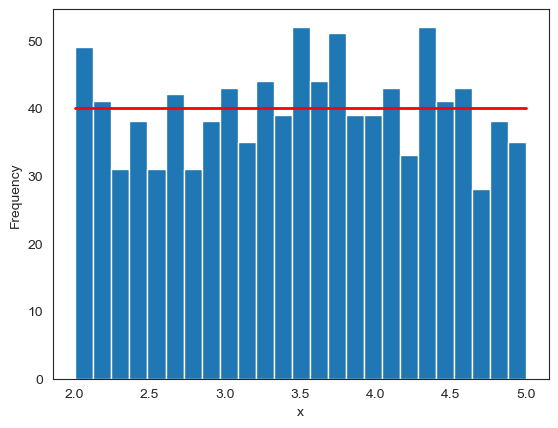

In [97]:
fig, ax = plt.subplots()

freqs, bins, _ = ax.hist(uni1000, bins=25)

# 평균 도수: freqs.mean() = 40.0
ax.plot(bins, np.ones_like(bins) * freqs.mean(), linewidth=2, color='r')

ax.set_xlabel('x')
ax.set_ylabel('Frequency')

plt.show()

**균등 분포의 히스토그램과 확률 밀도 함수**

`plt.hist()` 함수를 호출할 때 `density=True` 키워드 인자를 지정하면 각 구간별로 상대도수를 막대로 표현한다.
또한 전체 구역의 면적을 1로 만들기 위해 구간의 상대도수를 해당 구간의 크기로 나눈 값을 막대의 높이로 사용한다.

:::{admonition} 히스토그램의 막대 높이
:class: note

$t$ 개의 데이터 샘플을 $n$개의 구간으로 나누면서 히스토그램을 그린다고 하자.
이때 `density=True` 키워드 인자를 사용하면 $i$-번째 구간의 막대 높이 $h_i$는 
다음과 같이 해당 구간의 상대도수를 해당 구간의 크기로 나눈 값이다.
아래 식에서 $t_i$는 $i$-번째 구간의 도수, $w_i$는 $i$-번째 구간의 크기를 가리킨다.

$$
h_i = \frac{t_i}{t} \cdot \frac{1}{w_i}
$$

그러면 막대 면적의 총합은 다음과 같이 1로 계산된다.

$$
\sum_{i=1}^n h_i \cdot w_i = \sum_{i=1}^n \frac{t_i}{t} \cdot \frac{1}{w_i}\cdot w_i = \sum_{i=1}^n \frac{t_i}{t} = \frac 1 t \cdot \sum_{i=1}^n t_i = \frac t t = 1
$$
:::

따라서 데이터셋의 구간별 밀도를 나타내는 히스토그램과 확률 밀도 함수의 그래프와 밀접하게 연관된다.
예를 들어 균등 분포의 경우 구간별 밀도 히스토그램에서 구간별 막대 높이는 평균 $\frac{1}{b-a}$로 계산된다.
이유는 다음과 같다.

먼저 $t$는 데이터셋의 크기, $n$은 구간의 개수를 가리킨다고 하자.
그러면 구간별 평균 도수는 $\frac t n$이고, 따라서 구간별 평균 상대도수는 $\frac 1 n$이다.

$$
\frac{\displaystyle\frac{t}{n}}{t} = \frac 1 n
$$

각 구간의 크기는 일정하게 $\frac{b-a}{n}$이기에 앞서 언급한 정의에 의해
균등 분포 함수의 히스토그램에서 구간별 막대의 평균 높이는 다음과 같이 $\frac{1}{b-a}$다.

$$
\frac{1}{n} \cdot \frac{1}{\displaystyle \frac{b-a}{n}} = \frac 1 n \cdot \frac{n}{b-a} = \frac{1}{b-a}
$$

아래 코드는 균등 분포 함수로 선택된 데이터셋을 히스토그램으로 그렸을 때
막대의 평균 높이가 $1/3 = 0.33$에 매우 근접함을 보여준다.
그래프에서 빨간 직선은 이론적 평균 막대 높이인 0.333333을, 
노란 직선은 주어진 데이터셋의 실제 평균 막대 높이인 0.334067을 가리킨다.

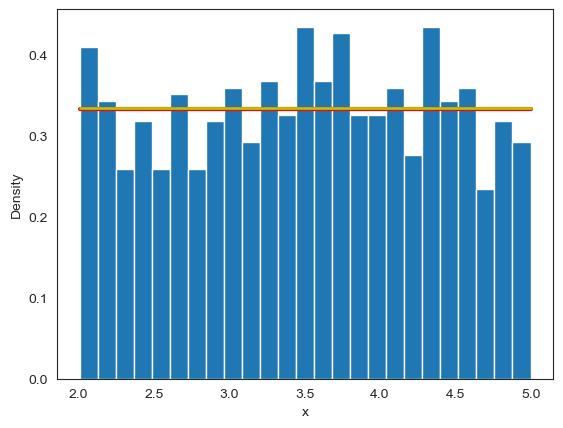

In [98]:
fig, ax = plt.subplots()

dens, bins, _ = ax.hist(uni1000, 25, density=True)

# 이론적 확률 밀도 함수 그래프: y = 1/(5-2) = 0.333333 (빨간 직선)
ax.plot(bins, np.ones_like(bins)/(5-2), linewidth=3, color='r')

# 실제 평균 밀도: dens.mean() = 0.334067 (노란 직선)
ax.plot(bins, np.ones_like(bins)*dens.mean(), linewidth=2, color='y')

ax.set_xlabel('x')
ax.set_ylabel('Density')

plt.show()

이론적 평균 막대 높이와 실제 평균 막대 높이가 다르게 계산되는 이유는 부동소수점 연산에 기인한다.
앞서 확인한 대로 구간별 실제 평균 도수는 $\frac{1000}{25} = 40$이기에 평균 막대 높이 또한 
이론적으로 다음과 같이 1/3로 나와야 한다.

$$
\frac{40}{1000} \cdot \frac{1}{\frac{3}{25}} = \frac{1}{25} \cdot \frac{25}{3} = \frac 1 3
$$

하지만 각 막대의 높이가 저장된 `dens`는 해당 구간의 실제 상대도수를 구간 크기 $3/25$으로 나눈 값을 사용하고,
그 값들의 평균을 계산하기 위해 또다시 부동소수점 연산을 사용하면서 이론 평균값인 1/3과 약간의 오차가 발생하게 된다.

(sec:kde)=
## 커널 밀도 추정

데이터셋이 주어졌을 때
**커널 밀도 추정**<font size='2'>kernel density estimation</font>(KDE) 기법을 이용하여
데이터 분포에 대한 확률 밀도 함수를 구할 수 있다.
여기서는 캘리포니아 데이터셋의 중위소득 분포에 대한 확률 밀도 함수를
KDE에 기반하여 구현할 수 있음을 보인다.

:::{admonition} KDE 기법 이해
:class: note

여기서는 KDE의 활용 결과만 언급한다.
KDE 기법 자체에 대한 설명은 나중에 정규 분포를 설명할 때 조금 다룬다.
보다 자세한 설명은 위키피디아의
[Kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation)를 참고할 수 있다.
:::

### Seaborn 라이브러리

캘리포니아 주택가격 데이터셋의 구역별 중위소득은 부동소수점을 사용하는 연속형 자료형이다.

In [99]:
housing.info()

<class 'pandas.core.series.Series'>
RangeIndex: 19675 entries, 0 to 19674
Series name: median_income
Non-Null Count  Dtype  
--------------  -----  
19675 non-null  float64
dtypes: float64(1)
memory usage: 153.8 KB


앞서 중위소득 확률 분포에 대한 누적 분포 함수를 다음과 같이 정의하였다.

```python
def F_income(a):
    mask = housing <= a # a 보다 같거나 작을 때만 1
    return mask.mean()  # 전체 중에 True 인 지역의 비율 
```

하지만 `F_income()` 함수는 유한개의 데이터 샘플로 구성된 데이터셋을 이용하여 정의된 함수이기에 
미분가능하지 않다. 
따라서 미분을 적용하여 중위소득 확률 분포에 대한 확률 밀도 함수를 구할 수 없다.
`F_income()` 함수를 모든 실수에 대해 정의되도록 할 수는 있지만 여기서는 그런 수학 기법까지 사용하지는 않는다.

대신 구간별 밀도 히스토그램을 이용하여 중위소득 데이터 분포에 대한 확률 밀도 함수의 그래프 형태를
그려본 다음에 **커널 밀도 추정**<font size='2'>kernel density estimation</font>(KDE) 기법으로
확률 밀도 함수를 구하는 방법을 소개한다.

아래 코드는 중위소득을 30개의 구간으로 등분하여 구간별 밀도를 막대로 표현한다.

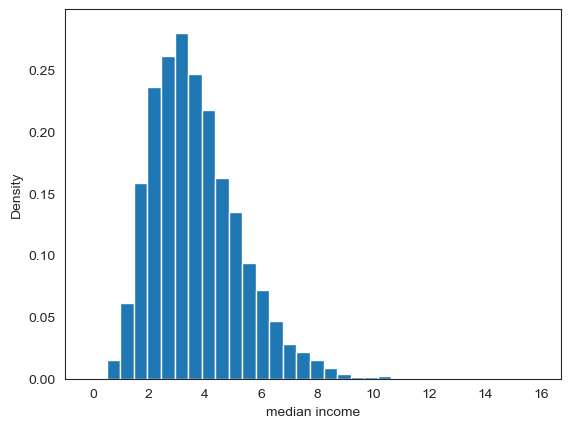

In [100]:
fig, ax = plt.subplots()

# 구간별 밀도 히스토그램
ax.hist(housing, bins=30, density=True)

ax.set_xlim([-1, 16.7])
ax.set_ylim([0.0, 0.299])

ax.set_xlabel('median income')
ax.set_ylabel('Density')

plt.show()

`plt.hist()` 함수를 `density=True` 키워드 인자와 함께 호출할 때 앞서 설명한 대로 막대 면적의 
총합이 1이 되도록 구간별 막대의 높이가 지정된다.
그러면 확률 밀도 함수의 그래프가 히스토그램에 사용된 막대들이 만드는 형태와 유사하게 그려진다. 
이유는 확률 밀도 함수 $f$와 $x$-축 사이의 면적이 지정된 구간 내에서 1이 되어야 하고,
$f(x)$가 크다는 것은 $x$ 근처에 데이터가 많이 모여 있음을, 
즉 해당 구간의 상대도수가 커서 결국 구간 밀도 막대가 높게 그려지기 때문이다.

**`sns.kdeplot()` 함수**

아래 코드의 `sns.kdeplot()` 함수는
가우스 커널을 사용하는 밀도 추정 기법(Gaussian KDE)을 활용하여 **추정된** 확률 밀도 함수의 그래프를 그린다.

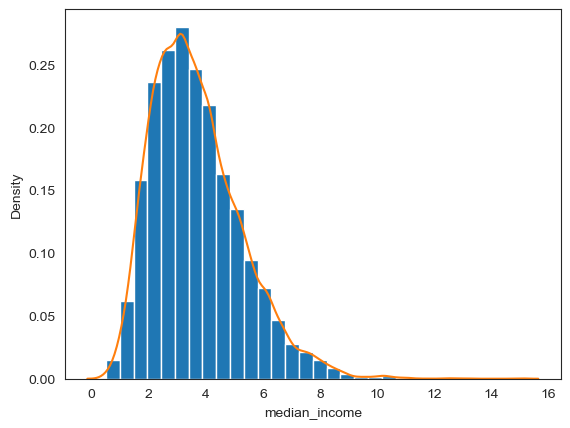

In [101]:
fig, ax = plt.subplots()

# 구간별 밀도 히스토그램
ax.hist(housing, bins=30, density=True)

# 추정된 확률 밀도 함수 그래프
kde = sns.kdeplot(ax=ax, data=housing)

plt.show()

가우스 KDE 기법으로 추정된 확률 밀도 함수는 모든 실수에 대해 정의된다.
이에 대한 자세한 설명은 이후에 정규 분포를 다룰 때 소개한다.

데이터의 범위 내에서만 확률 밀도 함수의 그래프를 그리도록 하려면 
`sns.kdeplot()` 함수를 호출할 때 `cut=0` 키워드 인자를 지정하면 된다.

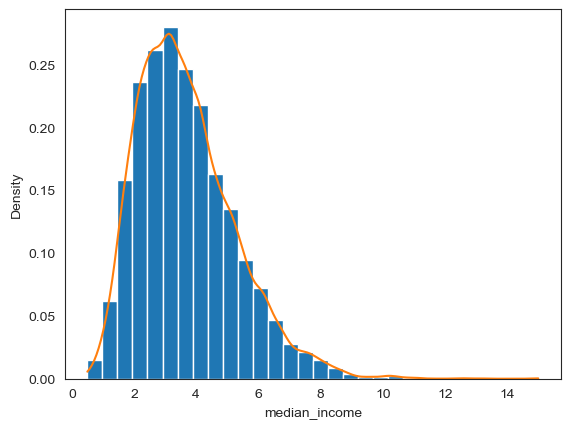

In [102]:
fig, ax = plt.subplots()

# 구간별 밀도 히스토그램
ax.hist(housing, bins=30, density=True)

# 추정된 확률 밀도 함수 그래프
kde = sns.kdeplot(ax=ax, data=housing, cut=0)

plt.show()

하지만 여기서는 `cut` 키워드 인자를 지정하지 않고 
확률 밀도 함수를 추정된 그대로 사용한다.

아래 코드는 확률 밀도 함수 그래프만 따로 확인한다.
그래프의 곡선이 일부 구간에서 급격하게 변해서 조금 부자연스러워 보인다.

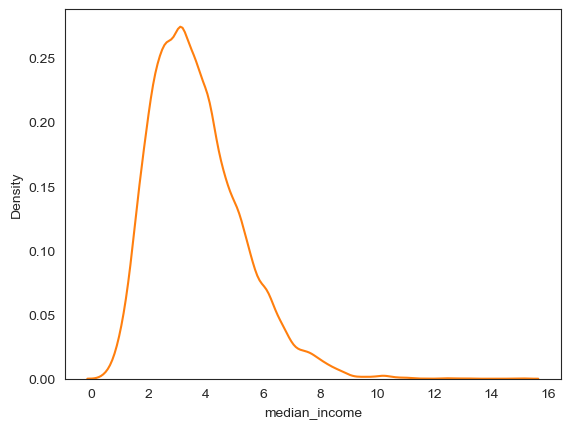

In [103]:
fig, ax = plt.subplots()

# 추정된 확률 밀도 함수 그래프
kde = sns.kdeplot(ax=ax, data=housing, color='tab:orange')

plt.show()

`sns.kdeplot()` 함수의 `bw_method=0.19` 키워드 인자를 함께 사용하면
추정된 확률 밀도 함수의 그래프가 보다 부드러워진다.

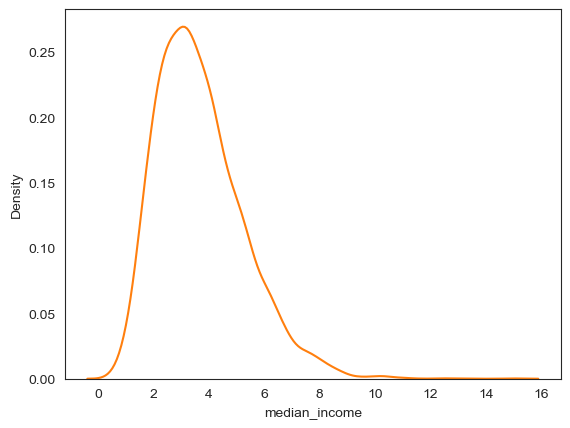

In [104]:
fig, ax = plt.subplots()

# 추정된 확률 밀도 함수 그래프
kde = sns.kdeplot(ax=ax, data=housing, color='tab:orange', bw_method=0.19)

plt.show()

구간별 밀도 히스토그램과 함께 그리면 자연스럽게 막대들의 끝을 따라 부드럽게 움직이는 것처럼 보인다.

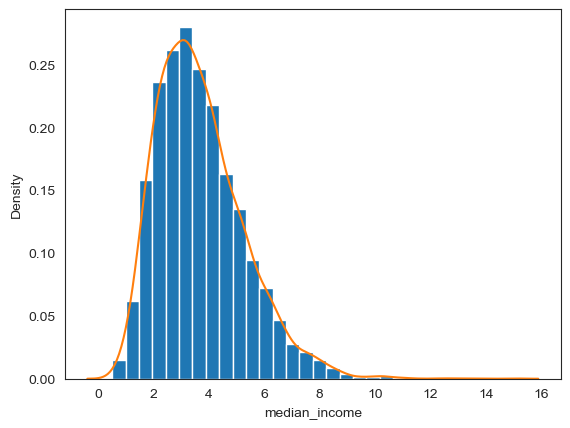

In [105]:
fig, ax = plt.subplots()

# 구간별 밀도 히스토그램
ax.hist(housing, bins=30, density=True)

# 추정된 확률 밀도 함수 그래프
kde = sns.kdeplot(ax=ax, data=housing, bw_method=0.19)

plt.show()

`bw_method` 변수는 평활모수(smoothing parameter, bandwidth)라고 불리는 값을 인자로 받는다.
기본 인자는 주어진 데이터를 활용해 자동으로 적절한 값으로 지정된다.
보다 자세한 설명은 이후에 정규 분포를 다룰 때 다룬다.
다만 값을 크게 지정할 수록 확률 밀도 함수 그래프의 곡선이 부드럽고 평평해진다는 점은 기억해 둔다.

예를 들어 아래 코드는 `bw_method=1`로 지정했을 때 구간별 밀도 히스토그램과 많이 동떨어지게 
추정된 확률 밀도 함수의 그래프를 생성함을 보여준다.

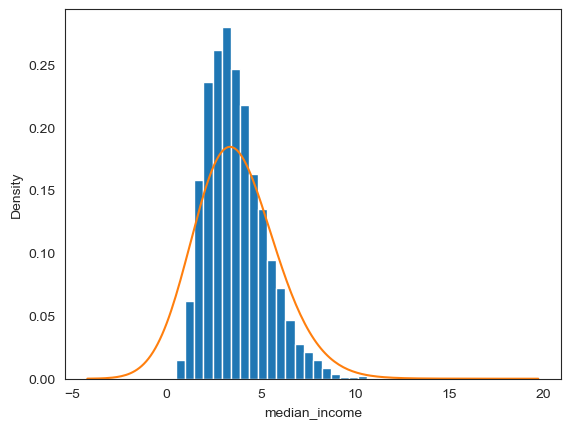

In [106]:
fig, ax = plt.subplots()

# 구간별 밀도 히스토그램
ax.hist(housing, bins=30, density=True)

# 추정된 확률 밀도 함수 그래프
kde = sns.kdeplot(ax=ax, data=housing, bw_method=1)

plt.show()

중위소득 데이터의 경우엔
자동으로 계산된 `bw_method`의 값보다 `bw_method=0.19`로 지정했을 때
중위소득의 구간별 밀도 히스토그램과 보다 잘 어울리는 확률 밀도 함수 그래프가 그려진다고 판단된다.
사실 커널 밀도 추정 기법은 여러 옵션에 의존하기 때문에 
사용자 입장에서 경우에 따라 보다 적절한 옵션을 수동으로 지정해줄 필요가 있다.

**`sns.histplot()` 함수**

Seaborn 라이브러리의 `histplot()` 함수가
`plt.hist()` 함수와 키워드 인자를 받는 매개변수명은 다르지만 기본적으로 동일하게 작동한다.
다만 Seaborn 라이브러리의 특성상 색상이 좀 더 연해진다.

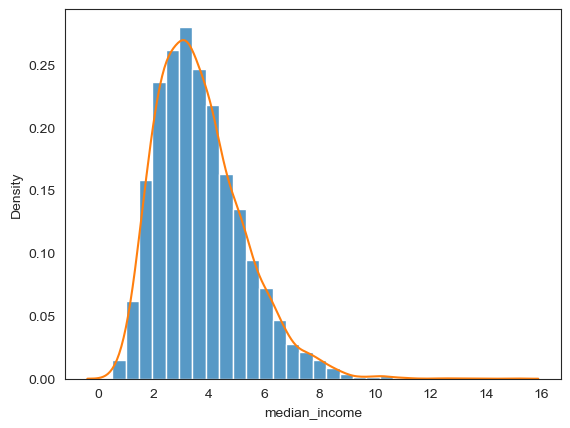

In [107]:
fig, ax = plt.subplots()

# 구간별 밀도 히스토그램
sns.histplot(ax=ax, data=housing, bins=30, stat='density')

# 추정된 확률 밀도 함수 그래프
kde = sns.kdeplot(ax=ax, data=housing, bw_method=.19, color='tab:orange')

plt.show()

참고로 `sns.kdeplot()` 함수의 반환값은 `matplotlib.axes._axes.Axes` 클래스의 객체이고
그려지는 그래프의 모든 정보를 담고 있다.
예를 들어 확률 밀도 함수 그래프의 좌표 정보는 아래와 같이 구한다. 

In [108]:
xs, ys = kde.get_lines()[0].get_data()

이렇게 얻어진 좌표를 이용하여 그래프를 그리면 동일한 확률 밀도 함수 그래프를 얻는다.

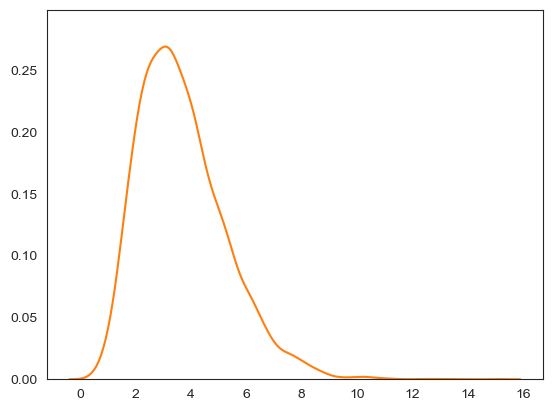

In [109]:
fig, ax = plt.subplots()

ax.plot(xs, ys, color='#ff7f0e')
ax.set_ylim([0.0, 0.299])

plt.show()

**`scipy.stats` 모듈**

그런데 `sns.kdeplot()` 함수는 확률 밀도 함수 자체를 제공하지 않는다.
대신 주요 통계 함수를 제공하는 `scipy.stats` 모듈의 `gaussian_kde()` 함수가
`sns.kdeplot()` 함수와 동일한 방식으로 커널 밀도 추정 기법을 활용하여 
주어진 데이터에 대한 확률 밀도 함수를 반환한다.

In [110]:
import scipy.stats

아래 코드는 `sns.kdeplot()` 함수를 호출할 때 사용된 `bw_method=0.19`를 동일하게 사용하여
중위소득 분포에 대한 확률 밀도 함수 `f_income()`을 정의한다.

In [111]:
f_income = scipy.stats.gaussian_kde(housing, bw_method=.19)

이전 그래프에서 사용된 확률 밀도 함수 그래프와 동일한 그래프를 `f_income()` 함수를 이용하여 그릴 수 있다.

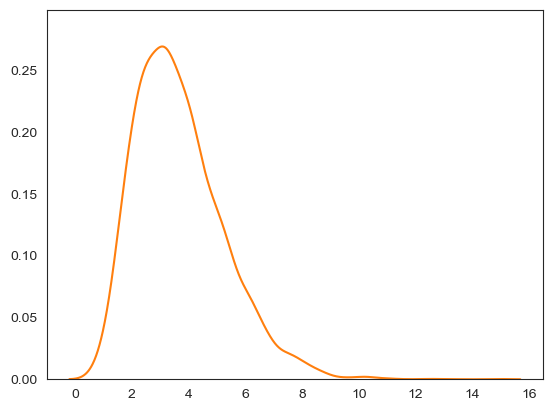

In [112]:
fig, ax = plt.subplots()

xs = np.arange(-0.2, 15.7, 0.01)

ax.plot(xs, f_income(xs), color='#ff7f0e')
# ax.set_xlim([-0.2, 15.7])
ax.set_ylim([0.0, 0.299])

plt.show()

### 확률 밀도 함수 적분

KDE 기법으로 생성된 확률 밀도 함수 `f_income()`이
앞서 중위소득 데이터를 이용하여 직접 정의한 `F_income()` 함수의 미분함수에 해당한다는 사실을 근사적으로 보일 수 있다.
이를 위해 `F_income(a)`가 `f_income()` 함수를 구간 `[-np.inf, a]`에서 정적분한 값과
매우 유사함을 보인다.
두 함숫값이 정확히 일치하지 않는 이유는 
`f_income()` 함수는 KDE 기법으로 이론적으로 추정된 함수이기에
함숫값 또한 추정값이기 때문이다.

**scipy.integrate 모듈**

정적분을 프로그래밍으로 직접 구현하는 일은 간단하지 않기에 
통계 관련 전문 라이브러리인 SciPy 라이브러리의 `integrate` 모듈에
포함된 `quad()` 함수를 이용한다.

In [113]:
from scipy.integrate import quad

:::{admonition} `scipy.integrate.quad()` 함수
:class: note

`quad()` 함수는 단변수 함수의 정적분을 계산한다.
함수에 사용된 알고리즘은 Fortran 이라는 계산 전용 프로그래밍언어을 위해
개발된 QUADPACK에 포함된 기능을 활용한다.
그래서 함수의 이름도 `quad()` 정해진 것으로 알려졌다.
:::

아래 코드는 중위소득의 범위에서 `f_income()` 함수를 정적분한 결과를 보여준다.
`quad()` 함수는 정적분값과 함께 계산된 값과 실제 값 사이의 오차를 함께 반환한다.

In [114]:
quad(f_income, housing.min(), housing.max())

(0.998388, 0.000000)

여기서는 `f_income()` 함수를 정적분했을 때
임의로 선택된 구역의 중위소득이 지정된 구간 안에 포함될 확률의 추정치가 계산되는가를
확인하고자 하기에 따라서 오차는 무시한다.

아래 `P_estimate()` 함수는 `quad()` 함수를 이용하여 $P(a \le X \le b)$를 추정하는 함수다.
즉, 앞서 정의한 `P_income()` 함수의 추정 함수다.

In [115]:
def P_estimate(a, b):
    p, _ = quad(f_income, a, b)
    return p

실수 전체 영역에서는 확률이 1이다.

In [116]:
P_estimate(-np.inf, np.inf)

1.000000

중위소득 범위에서의 확률은 1보다 아주 조금 작다.
이유는 앞서 추정된 확률 밀도 함수의 그래프에서 보았듯이
데이터 분포의 영역 밖에서도 확률 밀도가 0보다 큰 영역이 존재하기 때문이다.
KDE 기법이 원래 그렇게 작동한다.

In [117]:
P_estimate(housing.min(), housing.max())

0.998388

중위소득 범주가 2일 확률, 즉 중위소득이 1.5에서 3.0 사이에 위치할 확률은 다음과 같다.

In [118]:
P_estimate(1.5, 3.0)

0.329210

앞서 데이터로부터 직접 계산된 `P_income()` 함수가 계산한 확률과는 역시 약간의 오차만큼 작다.

In [119]:
P_income(1.5, 3.0)

0.333011

`P_estimate()` 함수의 첫째 인자를 음의 무한대로 지정하면 
앞서 정의한 누적 분포 함수인 `F_income()`과 유사한 값을 계산한다.
예를 들어 중위소득이 3.7 이하일 확률의 추정값은 다음과 같다.

In [120]:
P_estimate(-np.inf, 3.7)

0.561979

반면에 실제 확률은 다음과 같이 조금 더 크다.

In [121]:
F_income(3.7)

0.567217

### 히스토그램과 KDE 기법 활용 기준

지금까지의 설명과 예제를 보면 KDE 기법으로 추정된 확률 밀도 함수가 데이터셋의 실제 분포를 잘 추정하는 것으로 보인다.
KDE 기법은 그런데 **단봉 분포**<font size='2'>unimodal distribution</font>, 
즉 하나의 봉우리만 갖는 형태의 데이터 분포를 갖는 확률 변수에 대해서만 제대로 작동한다.
반면에 두 개의 봉우리를 갖는 형태의 **쌍봉 분포**<font size='2'>bimodal distribution</font>,
세 개 이상의 봉우리를 갖는 형태의 **다봉 분포**<font size='2'>multimodal distribution</font>에 대해서는
그렇지 않다.

추정 확률 밀도 함수는 또한 평활모수<font size='2'>bandwidth</font> 인자값에 의존한다.
적절한 평활모수를 정하는 일은 쉽지 않다. 
`sns.kdeplot()` 함수처럼 자동으로 적절한 평활모수를 찾아준다 하더라도
경우에 따라 수동으로 조절해줄 필요가 있는지 판단해야 한다.

적절한 평활모수는 히스토그램 그래프를 참고해서 결정할 것을 추천한다.
그런데 히스토그램이 전달하는 정보의 내용은 막대의 개수, 즉 각 구간의 크기에 의존함에 주의해야 한다.
결국 다양한 경우를 확인하여 사용자의 목적에 맞는 적절한 히스토그램과 평활모수를 지정할 필요가 있다.

[(연습) 연속 확률 분포](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-probability_continuous.ipynb)의
문제 8과 문제 9에서 에제를 통해 히스토그램과 KDE 기법의 활용 기준을 설명한다.

## 결합 확률 분포

$X$, $Y$ 두 개의 연속 확률 변수가 주어졌을 때 $(X, Y)$는 각각의 확률 변수가 취할 수 있는 값들의 조합을 가리키는 결합 확률 변수다.
$(X, y)$가 특정 영역에서 발생할 가능성의 확률 분포를
**연속 결합 확률 분포**<font size='2'>continuous joint probability distribution</font>라 부르며
$X$가 $a$에서 $b$ 사이에서, $Y$가 $c$에서 $d$ 사이에서 값을 취할 확률은

$$
P(a \le X \le b, c \le Y \le d) = p
$$

로 표현된다.
경우에 따라 아래처럼 표현되기도 한다.

$$
P(a \le X \le b \;\cap\; c \le Y \le d) = p
$$

또는

$$
P(a \le X \le b\;\;\text{and}\;\; c \le Y \le d) = p
$$

**예제: 캘리포니아 구역별 중위소득과 중위주택가격의 결합 확률 분포**

$X$가 캘리포니아의 구역별 중위소득을,
$Y$가 캘리포니아의 구역별 중위주택가격을 가리키는 확률 변수라 하자.
임의로 선택된 구역의 중위소득과 중위주택가격이 각각 특정 영역에 포함될 확률을
계산하는 연속 결합 확률 분포를 
부울 인덱싱을 이용하여 정의할 수 있다.

아래 코드는 캘리포니아 주택가격 데이터셋을 불러온 후에
중위주택가격이 50만을 초과하는 경우는 삭제하고 인덱스를 초기화한다.
최종적으로 중위소득과 중위주택가격 두 특성만 남긴다.

중위주택가격이 소수점 이하는 모두 0이라 정수로, 즉 이산형으로 간주할 수도 있지만 여기서는 단순하게 부동소수점으로,
즉 연속형 자료형으로 다룬다.

In [8]:
housing = pd.read_csv(data_url+"california_housing.csv")

# 중위주택가격이 50만1달러 이상인 구역 삭제
house_value_max = housing['median_house_value'].max() # 500,001
mask = housing['median_house_value'] >= house_value_max
housing = housing[~mask]

# 인덱스 초기화
housing = housing.reset_index(drop=True)

# 중위소득 특성만 선택
housing = housing.loc[:, ['median_income', 'median_house_value']]
housing.index.name = 'district'
housing

,median_income,median_house_value
district,,
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
19670,1.5603,78100.0
19671,2.5568,77100.0
19672,1.7000,92300.0


임의로 선택된 구역의 중위소득은 3.0에서 4.5 사이에,
중위주택가격은 15만에서 25만 사이에 위치할 확률을 계산하기 위해 부을 마스크를 지정한다.

In [9]:
a = 3.0
b = 4.5
c = 150_000
d = 250_000

mask_X = (a <= housing.median_income) & (housing.median_income <= b)
mask_Y = (c <= housing.median_house_value) & (housing.median_house_value <= d)

`pd.crosstab()` 함수를 이용하면 `True`와 `False`의 조합의 도수로 구성된
`2x2` 행렬 모양의 데이터프레임이 생성된다.

In [10]:
pd.crosstab(mask_X, mask_Y)

median_house_value,False,True
median_income,,
False,8610,3924
True,3763,3378


각각의 경우의 상대도수를 편하게 계산하기 위해 `margins=True` 키워드 인자를 지정하는 게 좋다.

In [11]:
pd.crosstab(mask_X, mask_Y, margins=True)

median_house_value,False,True,All
median_income,,,
False,8610,3924,12534
True,3763,3378,7141
All,12373,7302,19675


그러면 두 특성이 각각 지정된 구간에 포함될 확률은 두 특성이 모두
`True`인 칸에 위치한 값 0.171690, 즉 약 17.2% 정도로 계산된다.
아래 코드에서 19,675는 전체 경우의 수를 가리킨다.

In [12]:
pd.crosstab(mask_X, mask_Y, margins=True) / 19675

median_house_value,False,True,All
median_income,,,
False,0.437611,0.199441,0.637052
True,0.191258,0.171690,0.362948
All,0.628869,0.371131,1.000000


참고로 언급된 두 구간은 {numref}`%s장 <ch:probability-discrete>`에서 각각 중위소득 3구간,
중위주택가격 4구간으로 지정되었으며
당시 이산 결합 확률 변수가 각각의 구간에 속할 확률은 0.169911, 즉 약 17%로 계산되었다.

차이가 발생하는 이유는 캘리포니아 주택 데이터셋은 유한 개의 데이터만 포함하기에
확률 변수가 특정 실수를 가질 확률이 0이 아니기 때문이다.
실제로 중위소득이 3.0일 확률이 0이 아니다.

In [13]:
mask3 = housing.median_income == 3.0
mask3.mean()

0.001931

이 점을 고려해서 `mask_X`와 `mask_Y`의 {numref}`%s장 <ch:probability-discrete>` 에서 사용한 구간과 동일하게 지정하면,
즉, 구간의 왼쪽 끝을 제외시키면 결과가 0.169911로 이산 결합 확률 분포의 경우와 동일하게 나온다.

In [14]:
mask_X = (a < housing.median_income) & (housing.median_income <= b)
mask_Y = (c < housing.median_house_value) & (housing.median_house_value <= d)
pd.crosstab(mask_X, mask_Y, margins=True) / 19675

median_house_value,False,True,All
median_income,,,
False,0.441017,0.197967,0.638983
True,0.191105,0.169911,0.361017
All,0.632122,0.367878,1.000000


그럼에도 불구하여 여기서는 연속 결합 확률 분포를 계산하기에 구간의 왼쪽 끝을 포함하면서
결합 확률을 계산한다.

**결합 확률 분포 함수**

앞서 사용한 예제를 일반화하여
중위소득은 $a$ 와 $b$ 사이에서, 
중위주택가격은 $c$ 와 $d$ 사이에서
값을 가질 확률을 계산하는 결합 확률 분포 함수를 
다음과 같이 두 개의 부울 마스크를 이용하여 선언한다.

In [17]:
def p_XY(a, b, c, d):
    mask_X = (a <= housing.median_income) & (housing.median_income <= b)
    mask_Y = (c <= housing.median_house_value) & (housing.median_house_value <= d)
    cross_XY = pd.crosstab(mask_X, mask_Y, margins=True)
    total = cross_XY.loc['All', 'All']
    cross_XY_prob = cross_XY / total
    return cross_XY_prob.loc[True, True]

중위소득은 3구간에, 중위주택가격은 4구간에 속할 확률이
이전과 동일하게 확인된다.

In [18]:
p_XY(a, b, c, d)

0.171690

**결합 확률 분포 함수의 성질**

두 확률 변수가 취할 수 있는 전 영역에서의 결합 확률은 1이다.

In [19]:
p_XY(-np.inf, np.inf, -np.inf, np.inf)

1.000000

(sec:kde-multivariate)=
## 다변량 커널 밀도 추정

데이터셋이 주어졌을 때
**커널 밀도 추정**<font size='2'>kernel density estimation</font>(KDE) 기법을 이용하여
결합 확률 분포 함수를 구할 수 있다.

### 결합 확률 밀도 함수

연속 확률 변수 $X$에 대한 누적 분포 함수 $F(a)$를 계산할 때
확률 밀도 함수의 적분으로 계산하였다.

$$
F(a) = P(X \le a) = \int_{-\infty}^{a} f(x)\; dx
$$

단변량 누적 분포 함수를 계산할 때처럼
$(X, Y)$ 결합 확률 변수에 대한 결합 확률 분포 함수도 결합 확률 밀도 함수의 적분으로 계산할 수 있다.
단, 결합 확률 밀도 함수 $f(x, y)$는 항상 음이 아닌 실수이어야 한다.

$$
P(a \le X \le b, c \le Y \le d) = \int_{a}^{b} \int_{c}^{d} f(x, y)\; dx\, dy
$$

앞서 활용한
`scipy.stats` 모듈의 `gaussian_kde()` 함수가 
커널 밀도 추정(KDE) 기법을 적용하여
결합 확률 분포에 대해서도 확률 밀도 함수를 계산한다.
하지만 기초 수준에서 다루기에는 조금 어려워서 더 이상 언급하지 않는다.
대신 결합 확률 분포의 시각화를 통해 특성들 사이의 상관관계를 확인하는 방법을 간단하게 소개한다.

### 결합 확률 분포 시각화

Seaborn 라이브러리의 `kdeplot()` 함수를 활용하여
두 개의 확률 변수를 결합하는 이변량 결합 확률 분포를 다양한 방식으로 시각화할 수 있다.

먼저 아래 코드는 결합 확률 변수의 분포를 등고선 형식으로 그려준다.
안쪽 등고선이 보다 높은 데이터 밀도를 갖는다.

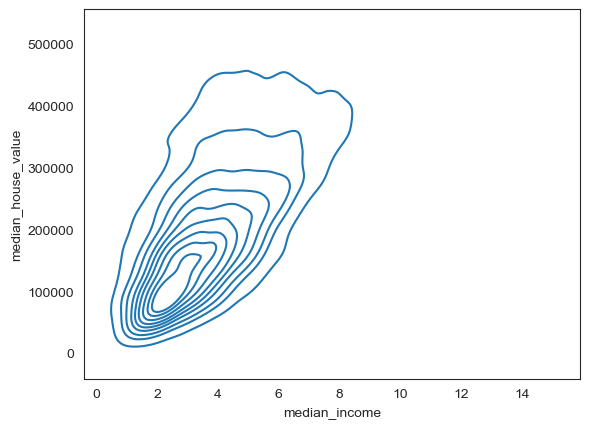

In [25]:
fig, ax = plt.subplots()

# 추정된 확률 밀도 함수 그래프
sns.kdeplot(ax = ax, data=housing, x="median_income", y="median_house_value")

plt.show()

아래 코드는 데이터 산점도와 확률 밀도 함수 그래프를 함께 그린다.
산점도와 등고선을 구분하기 위해 등고선 색상을 변경한다.

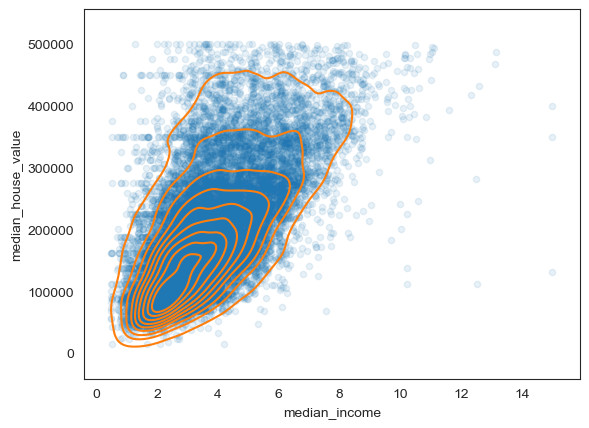

In [35]:
fig, ax = plt.subplots()

# 추정된 확률 밀도 함수 그래프
sns.kdeplot(ax = ax, data=housing, x="median_income", y="median_house_value", color='tab:orange')
housing.plot.scatter(x="median_income", y="median_house_value", ax=ax, alpha=.1)

plt.show()

`sns.kdeplot()` 함수 자체로 밀도를 색으로 구분해주는 기능이 있다. 
또한 색막대를 이용하여 색상에 따른 밀도를 함께 확인할 수도 있다.

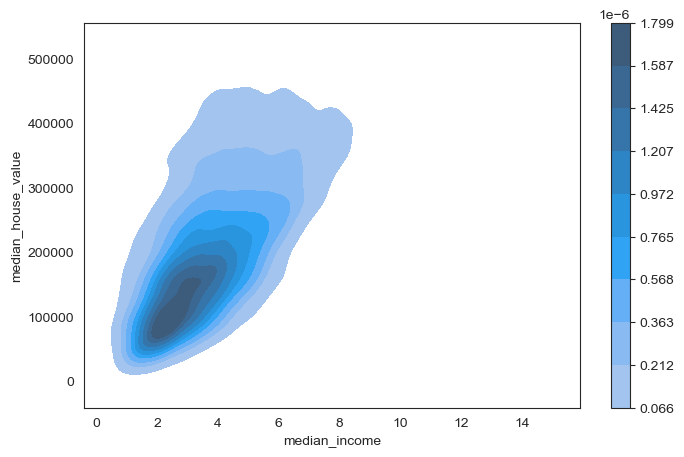

In [31]:
fig, ax = plt.subplots(figsize=(8, 5))

# 추정된 확률 밀도 함수 그래프
sns.kdeplot(ax = ax, data=housing, x="median_income", y="median_house_value", fill=True, cbar=True)

plt.show()

## Cycler 색상표

`matplotlib.axes._axes.Axes` 클래스는 이미지를 담당하는 객체를 생성할 때 활용된다.
하나의 이미지에 여러 개의 그래프를 구분하며 그릴 때 색을 사용한다.
`matplotlib.pyplot`과 `seaborn` 라이브러리는 하나의 이미지에 여러 개의 그래프를 그릴 때
최대 10개의 색으로 구분한다.
10개 보다 많은 그래프를 하나의 이미지에 그릴 때는 10개의 색이 순환되며,
이런 의미에서 **cycler 색상표**라 부른다.

아래 코드는 한 이미지에 포함된 여러 개의 그래프를 구분하기 위해 사용하는 10개의 색 순서와
색 이름을 문자열과 hex code라 불리는 16진수를 멋진 이미지로 그린다.

:::{admonition} 주의사항
:class: warning

아래 코드는 그래프를 그릴 때 사용되는 색과 색의 코드를 보여주는 용도로만 사용된다.
코드 자체를 이해하지 못해도 상관 없다.
:::

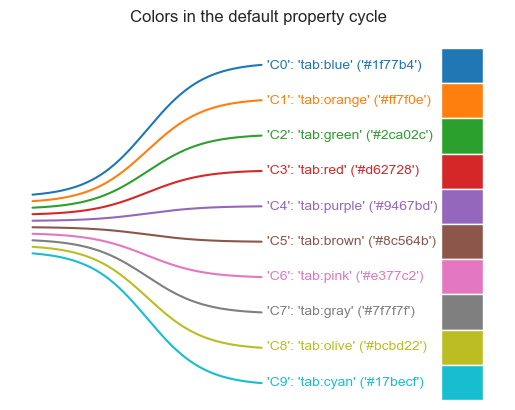

In [140]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import TABLEAU_COLORS, same_color


def sigmoid_like(x, pos):
    """S-자 곡선 함수. 대략적으로 pos 위치에서 끝남."""
    return 0.85 * pos * (1 / (1 + np.exp(-x)) + 0.2)


fig, ax = plt.subplots()
ax.axis('off')
ax.set_title("Colors in the default property cycle")

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
x = np.linspace(-4, 4, 200)

for i, (color, color_name) in enumerate(zip(colors, TABLEAU_COLORS)):
    assert same_color(color, color_name)
    pos = 4.5 - i
    ax.plot(x, sigmoid_like(x, pos))
    ax.text(4.2, pos, f"'C{i}': '{color_name}' ('{color}')", color=color, va="center")
    ax.bar(11, 1, width=1.5, bottom=pos-0.5)

plt.show()

참고로 지금까지 확률 밀도 함수의 그래프는 모두 Cycler 색상의 두번째(C1)인 주황색(`tab:orange` 또는 `#ff7f0e`)으로 지정되었다.

## 연습문제

참고: [(연습) 연속 확률 분포](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-probability_continuous.ipynb)